In [82]:
import os
import pandas as pd
path = r"C:\Users\Wong\Desktop\Dissertation\Imputed_dataset"

Haltwhistle_water = pd.read_csv(os.path.join(path, 'Haltwhistle_water.csv'))
Haltwhistle_rainfall = pd.read_csv(os.path.join(path, 'Haltwhistle_rainfall.csv'))

In [83]:
Haltwhistle_water['dateTime'] = pd.to_datetime(Haltwhistle_water['dateTime'])
Haltwhistle_rainfall['dateTime'] = pd.to_datetime(Haltwhistle_rainfall['dateTime'])

In [84]:
Haltwhistle_water.set_index('dateTime', inplace=True)
Haltwhistle_rainfall.set_index('dateTime', inplace=True)

In [85]:
start_date = pd.to_datetime('13/11/2020 00:00:00', format='%d/%m/%Y %H:%M:%S')
end_date = pd.to_datetime('3/2/2024 00:00:00', format='%d/%m/%Y %H:%M:%S')
Haltwhistle_water_subset = Haltwhistle_water.loc[(Haltwhistle_water.index >= start_date) & (Haltwhistle_water.index <= end_date)]
Haltwhistle_rainfall_subset = Haltwhistle_rainfall.loc[(Haltwhistle_rainfall.index >= start_date) & (Haltwhistle_rainfall.index <= end_date)]

In [86]:
Haltwhistle_water_subset.shape

(112993, 1)

In [87]:
Haltwhistle_rainfall_subset.shape

(112993, 1)

In [88]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [89]:
merged_data = pd.merge(Haltwhistle_rainfall_subset, Haltwhistle_water_subset, on='dateTime', how='inner')

In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
merged_data = scaler.fit_transform(merged_data)

In [91]:
train_data = merged_data[:90394]
test_data = merged_data[90394:]

In [12]:
window_size = 96
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
lr_Halt_96in_48out = LinearRegression()
cv_scores_Halt_96in_48out_lr = cross_val_score(lr_Halt_96in_48out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [14]:
cv_scores_Halt_96in_48out_lr = -cv_scores_Halt_96in_48out_lr
print("Cross-validation scores:")
print(cv_scores_Halt_96in_48out_lr)
print("Mean MSE:", cv_scores_Halt_96in_48out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Halt_96in_48out_lr.std())

Cross-validation scores:
[0.0024416  0.00599419 0.00091347 0.00503917 0.00247927]
Mean MSE: 0.0033735407477311257
Standard Deviation MSE: 0.0018634533947056258


In [15]:
window_size = 48
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [16]:
lr_Halt_48in_48out = LinearRegression()
cv_scores_Halt_48in_48out_lr = cross_val_score(lr_Halt_48in_48out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [17]:
cv_scores_Halt_48in_48out_lr = -cv_scores_Halt_48in_48out_lr
print("Cross-validation scores:")
print(cv_scores_Halt_48in_48out_lr)
print("Mean MSE:", cv_scores_Halt_48in_48out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Halt_48in_48out_lr.std())

Cross-validation scores:
[0.00247612 0.00602499 0.00097256 0.00528683 0.0024728 ]
Mean MSE: 0.003446660286023961
Standard Deviation MSE: 0.0018997639591178212


In [18]:
window_size = 24
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [19]:
lr_Halt_24in_48out = LinearRegression()
cv_scores_Halt_24in_48out_lr = cross_val_score(lr_Halt_24in_48out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [20]:
cv_scores_Halt_24in_48out_lr = -cv_scores_Halt_24in_48out_lr
print("Cross-validation scores:")
print(cv_scores_Halt_24in_48out_lr)
print("Mean MSE:", cv_scores_Halt_24in_48out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Halt_24in_48out_lr.std())

Cross-validation scores:
[0.00245978 0.0060619  0.00097976 0.00540222 0.00251454]
Mean MSE: 0.0034836394236697453
Standard Deviation MSE: 0.001927968244141661


Now try the different window size 24,48,96 for 32output

In [21]:
window_size = 96
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [22]:
lr_Halt_96in_32out = LinearRegression()
cv_scores_Halt_96in_32out_lr = cross_val_score(lr_Halt_96in_32out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [23]:
cv_scores_Halt_96in_32out_lr = -cv_scores_Halt_96in_32out_lr
print("Cross-validation scores:")
print(cv_scores_Halt_96in_32out_lr)
print("Mean MSE:", cv_scores_Halt_96in_32out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Halt_96in_32out_lr.std())

Cross-validation scores:
[0.00171551 0.00407644 0.0006401  0.00328742 0.00163186]
Mean MSE: 0.002270265744134766
Standard Deviation MSE: 0.00123851697469091


In [24]:
window_size = 48
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [25]:
lr_Halt_48in_32out = LinearRegression()
cv_scores_Halt_48in_32out_lr = cross_val_score(lr_Halt_48in_32out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [26]:
cv_scores_Halt_48in_32out_lr = -cv_scores_Halt_48in_32out_lr
print("Cross-validation scores:")
print(cv_scores_Halt_48in_32out_lr)
print("Mean MSE:", cv_scores_Halt_48in_32out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Halt_48in_32out_lr.std())

Cross-validation scores:
[0.00166432 0.00407142 0.00066895 0.00340674 0.00164893]
Mean MSE: 0.0022920744229729777
Standard Deviation MSE: 0.001253061459825855


In [27]:
window_size = 24
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [28]:
lr_Halt_24in_32out = LinearRegression()
cv_scores_Halt_24in_32out_lr = cross_val_score(lr_Halt_24in_32out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [29]:
cv_scores_Halt_24in_32out_lr = -cv_scores_Halt_24in_32out_lr
print("Cross-validation scores:")
print(cv_scores_Halt_24in_32out_lr)
print("Mean MSE:", cv_scores_Halt_24in_32out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Halt_24in_32out_lr.std())

Cross-validation scores:
[0.00166526 0.00409921 0.00066587 0.00347731 0.00167513]
Mean MSE: 0.002316554438808168
Standard Deviation MSE: 0.0012716579108172457


Now try the different window size 24,48,96 for 16output

In [30]:
window_size = 96
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [31]:
lr_Halt_96in_16out = LinearRegression()
cv_scores_Halt_96in_16out_lr = cross_val_score(lr_Halt_96in_16out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [32]:
cv_scores_Halt_96in_16out_lr = -cv_scores_Halt_96in_16out_lr
print("Cross-validation scores:")
print(cv_scores_Halt_96in_16out_lr)
print("Mean MSE:", cv_scores_Halt_96in_16out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Halt_96in_16out_lr.std())

Cross-validation scores:
[0.0006343  0.00163495 0.00028682 0.00158178 0.0006481 ]
Mean MSE: 0.0009571918128981939
Standard Deviation MSE: 0.0005474795521809507


In [33]:
window_size = 48
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [34]:
lr_Halt_48in_16out = LinearRegression()
cv_scores_Halt_48in_16out_lr = cross_val_score(lr_Halt_48in_16out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [35]:
cv_scores_Halt_48in_16out_lr = -cv_scores_Halt_48in_16out_lr
print("Cross-validation scores:")
print(cv_scores_Halt_48in_16out_lr)
print("Mean MSE:", cv_scores_Halt_48in_16out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Halt_48in_16out_lr.std())

Cross-validation scores:
[0.00061766 0.00163084 0.00029181 0.00161591 0.00065603]
Mean MSE: 0.0009624508628114767
Standard Deviation MSE: 0.0005543090985604584


In [36]:
window_size = 24
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [37]:
lr_Halt_24in_16out = LinearRegression()
cv_scores_Halt_24in_16out_lr = cross_val_score(lr_Halt_24in_16out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [38]:
cv_scores_Halt_24in_16out_lr = -cv_scores_Halt_24in_16out_lr
print("Cross-validation scores:")
print(cv_scores_Halt_24in_16out_lr)
print("Mean MSE:", cv_scores_Halt_24in_16out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Halt_24in_16out_lr.std())

Cross-validation scores:
[0.00061989 0.00162672 0.00028647 0.00163548 0.00066523]
Mean MSE: 0.0009667560231526795
Standard Deviation MSE: 0.0005579926195246332


Now try the different window size 24,48,96 for 8output

In [39]:
window_size = 96
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [40]:
lr_Halt_96in_8out = LinearRegression()
cv_scores_Halt_96in_8out_lr = cross_val_score(lr_Halt_96in_8out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [41]:
cv_scores_Halt_96in_8out_lr = -cv_scores_Halt_96in_8out_lr
print("Cross-validation scores:")
print(cv_scores_Halt_96in_8out_lr)
print("Mean MSE:", cv_scores_Halt_96in_8out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Halt_96in_8out_lr.std())

Cross-validation scores:
[1.94544083e-04 4.92294478e-04 9.00448248e-05 7.36378376e-04
 2.32128449e-04]
Mean MSE: 0.00034907804218287564
Standard Deviation MSE: 0.00023459269205857125


In [42]:
window_size = 48
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [43]:
lr_Halt_48in_8out = LinearRegression()
cv_scores_Halt_48in_8out_lr = cross_val_score(lr_Halt_48in_8out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [44]:
cv_scores_Halt_48in_8out_lr = -cv_scores_Halt_48in_8out_lr
print("Cross-validation scores:")
print(cv_scores_Halt_48in_8out_lr)
print("Mean MSE:", cv_scores_Halt_48in_8out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Halt_48in_8out_lr.std())

Cross-validation scores:
[1.89913142e-04 4.91307646e-04 9.04414655e-05 7.41984165e-04
 2.33982127e-04]
Mean MSE: 0.00034952570897049836
Standard Deviation MSE: 0.00023667568253126728


In [45]:
window_size = 24
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [46]:
lr_Halt_24in_8out = LinearRegression()
cv_scores_Halt_24in_8out_lr = cross_val_score(lr_Halt_24in_8out, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

In [47]:
cv_scores_Halt_24in_8out_lr = -cv_scores_Halt_24in_8out_lr
print("Cross-validation scores:")
print(cv_scores_Halt_24in_8out_lr)
print("Mean MSE:", cv_scores_Halt_24in_8out_lr.mean())
print("Standard Deviation MSE:", cv_scores_Halt_24in_8out_lr.std())

Cross-validation scores:
[1.91725532e-04 4.87491244e-04 8.89279676e-05 7.45255273e-04
 2.35505826e-04]
Mean MSE: 0.00034978116855334627
Standard Deviation MSE: 0.0002372545735586139


Use grid search to find the best parameters for the selected window size of different output size

In [ ]:
cv_scores_Halt_96in_48out_lr

In [ ]:
cv_scores_Halt_96in_32out_lr

In [ ]:
cv_scores_Halt_96in_16out_lr

In [ ]:
cv_scores_Halt_96in_8out_lr

In [75]:
window_size = 96
future_steps = 48

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [76]:
lr_Halt_96in_48out_1 = LinearRegression()

In [77]:
lr_Halt_96in_48out_1.fit(X_train, y_train)

LinearRegression()

In [78]:
pred_lr_Halt_96in_48out = lr_Halt_96in_48out_1.predict(X_test)

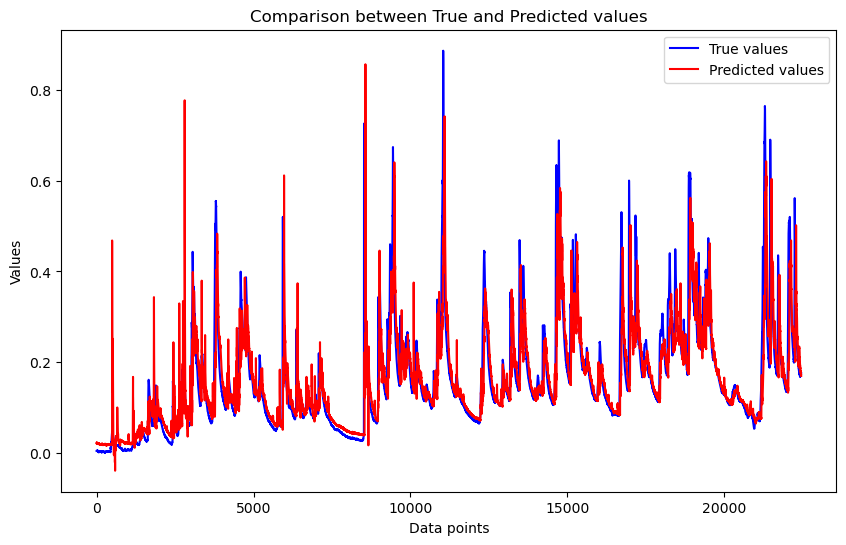

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_lr_Halt_96in_48out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [80]:
def nse(y_test, pred_lr_Halt_96in_48out):
    numerator = np.sum((y_test - pred_lr_Halt_96in_48out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_lr_Halt_96in_48out)
mae = mean_absolute_error(y_test, pred_lr_Halt_96in_48out)
nse_value = nse(y_test, pred_lr_Halt_96in_48out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.005676251564980639
MAE: 0.041263484901544516
NSE: 0.6111363958033774


In [81]:
from joblib import dump
dump(lr_Halt_96in_48out_1, 'lr_Halt_96in_48out.joblib')

['lr_Halt_96in_48out.joblib']

In [57]:
window_size = 96
future_steps = 32

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [58]:
lr_Halt_96in_32out = LinearRegression()
lr_Halt_96in_32out.fit(X_train, y_train)

LinearRegression()

In [59]:
pred_lr_Halt_96in_32out = lr_Halt_96in_32out.predict(X_test)

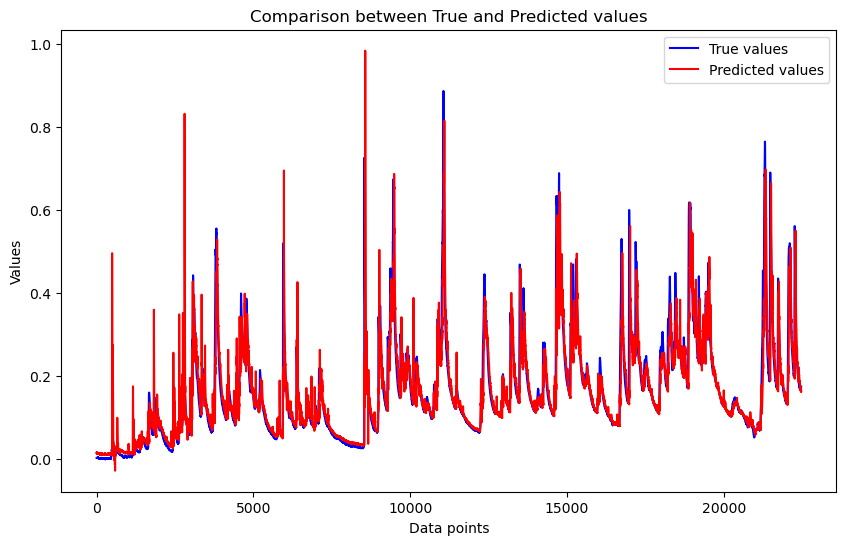

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_lr_Halt_96in_32out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [61]:
def nse(y_test, pred_lr_Halt_96in_32out):
    numerator = np.sum((y_test - pred_lr_Halt_96in_32out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_lr_Halt_96in_32out)
mae = mean_absolute_error(y_test, pred_lr_Halt_96in_32out)
nse_value = nse(y_test, pred_lr_Halt_96in_32out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.003431439916429304
MAE: 0.029600582989130014
NSE: 0.76505944394751


In [62]:
from joblib import dump
dump(lr_Halt_96in_32out, 'lr_Halt_96in_32out.joblib')

['lr_Halt_96in_32out.joblib']

In [63]:
window_size = 96
future_steps = 16

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [64]:
lr_Halt_96in_16out = LinearRegression()
lr_Halt_96in_16out.fit(X_train, y_train)

LinearRegression()

In [65]:
pred_lr_Halt_96in_16out = lr_Halt_96in_16out.predict(X_test)

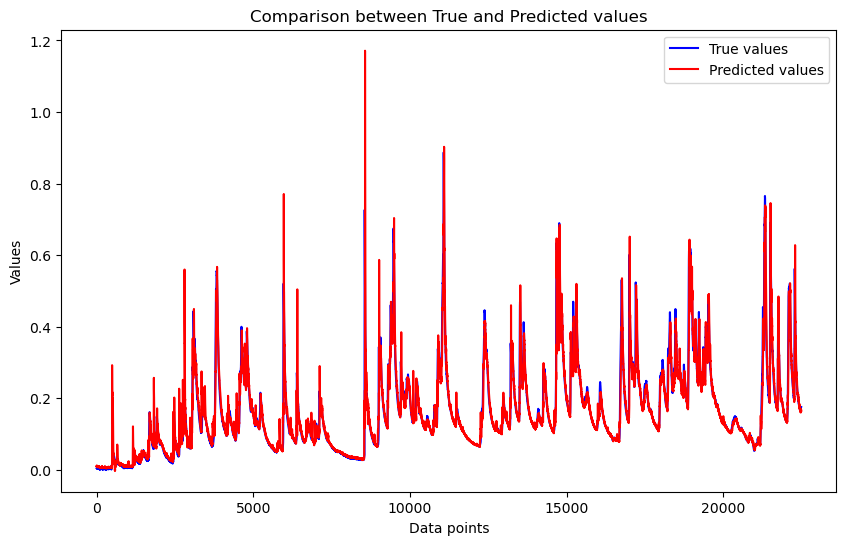

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_lr_Halt_96in_16out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [67]:
def nse(y_test, pred_lr_Halt_96in_16out):
    numerator = np.sum((y_test - pred_lr_Halt_96in_16out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_lr_Halt_96in_16out)
mae = mean_absolute_error(y_test, pred_lr_Halt_96in_16out)
nse_value = nse(y_test, pred_lr_Halt_96in_16out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.0013573456212678872
MAE: 0.016034372665989102
NSE: 0.9071203055505643


In [68]:
from joblib import dump
dump(lr_Halt_96in_16out, 'lr_Halt_96in_16out.joblib')

['lr_Halt_96in_16out.joblib']

In [92]:
window_size = 48
future_steps = 8

X_train, y_train = [], []
X_test, y_test = [], []

for i in range(window_size, len(train_data) - future_steps + 1):
    X_train.append(train_data[i - window_size:i, :])
    y_train.append(train_data[i + future_steps - 1, -1])

for i in range(window_size, len(test_data) - future_steps + 1):
    X_test.append(test_data[i - window_size:i, :])
    y_test.append(test_data[i + future_steps - 1, -1])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [93]:
from sklearn.linear_model import LinearRegression
lr_Halt_48in_8out = LinearRegression()
lr_Halt_48in_8out.fit(X_train, y_train)

LinearRegression()

In [94]:
pred_lr_Halt_48in_8out = lr_Halt_48in_8out.predict(X_test)

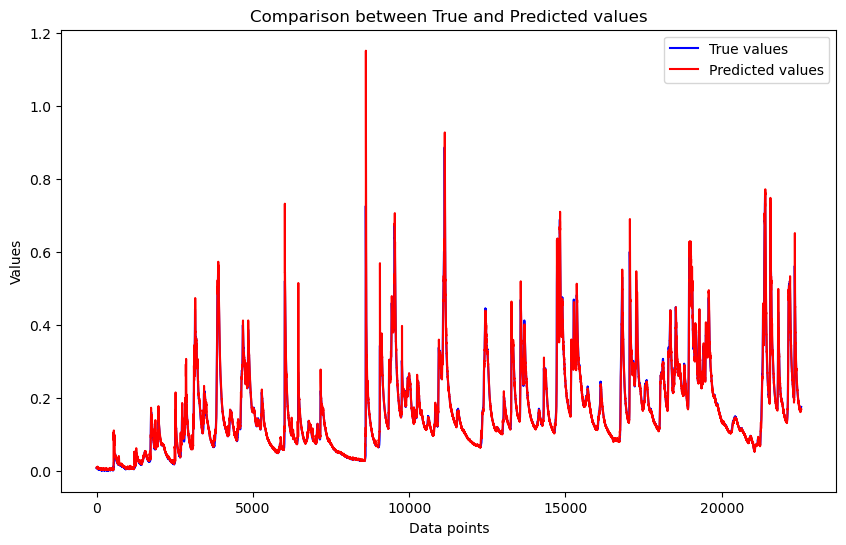

In [95]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True values', color='blue')
plt.plot(pred_lr_Halt_48in_8out, label='Predicted values', color='red')
plt.title('Comparison between True and Predicted values')
plt.xlabel('Data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [96]:
def nse(y_test, pred_lr_Halt_48in_8out):
    numerator = np.sum((y_test - pred_lr_Halt_48in_8out) ** 2)
    denominator = np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - (numerator / denominator)

mse = mean_squared_error(y_test, pred_lr_Halt_48in_8out)
mae = mean_absolute_error(y_test, pred_lr_Halt_48in_8out)
nse_value = nse(y_test, pred_lr_Halt_48in_8out)

print("Performance metrics:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"NSE: {nse_value}")

Performance metrics:
MSE: 0.0005016613528723816
MAE: 0.00772412210871391
NSE: 0.9657358767894875


In [97]:
from joblib import dump
dump(lr_Halt_48in_8out, 'lr_Halt_48in_8out.joblib')

['lr_Halt_48in_8out.joblib']